In [1]:
from __future__ import division
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
email = pd.read_csv('email_table.csv')
email_open = pd.read_csv('email_opened_table.csv')
email_link = pd.read_csv('link_clicked_table.csv')

In [3]:
def load_data():
    email = pd.read_csv('email_table.csv')
    email_open = pd.read_csv('email_opened_table.csv')
    email_link = pd.read_csv('link_clicked_table.csv')
    
    email_open['email_open']=1
    email = email.merge(email_open,left_on='email_id',right_on='email_id',how='outer')
    email = email.fillna(0)
    
    
    email_link['link_click']=1
    email = email.merge(email_link,left_on='email_id',right_on='email_id',how='outer')
    email = email.fillna(0)
    
    return email

def refine_data(df):
    df = pd.get_dummies(data=df,drop_first=True,columns=['email_text','email_version','user_country','weekday'])
    df['email_open'] = df['email_open']==1
    df['link_click'] = df['link_click']==1
    return df

In [4]:
email = load_data()
df_email = refine_data(email)

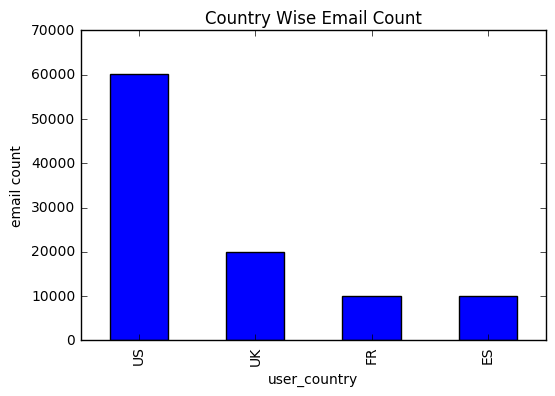

In [98]:
country_tot = email.groupby('user_country').apply(len).sort_values(ascending=False)
country_tot.plot(kind='bar',title='Country Wise Email Count').set_ylabel('email count')

# Country Wise Email Conversion Analysis

In [183]:
tmp = email.groupby('user_country').agg({'email_id':'size','email_open':'sum','link_click':'sum'})

In [184]:
tmp['email_open_per']= (tmp['email_open']/tmp['email_id'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_id'])*100

In [211]:
tmp

,email_id,email_open,link_click,email_open_per,link_click_per
user_country,,,,,
ES,9967,390.0,83.0,3.912913,0.832748
FR,9995,406.0,80.0,4.062031,0.800400
UK,19939,2396.0,492.0,12.016651,2.467526
US,60099,7153.0,1464.0,11.902028,2.435981


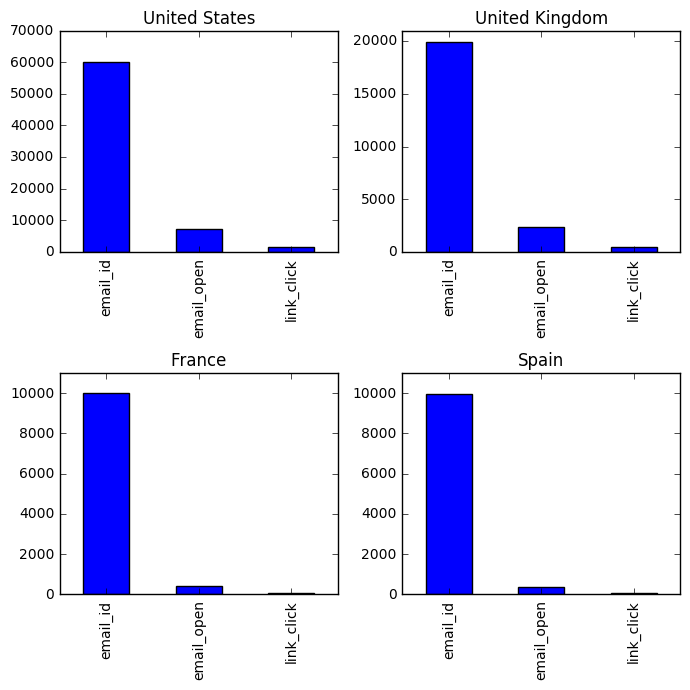

In [214]:
fig,ax = plt.subplots(2,2,figsize=(7,7))
tmp[tmp.index=='US'][['email_id','email_open','link_click']].T.plot(kind='bar',legend=False,title = 'United States',ax=ax[0,0])
tmp[tmp.index=='UK'][['email_id','email_open','link_click']].T.plot(kind='bar',legend=False,title = 'United Kingdom',ax=ax[0,1],ylim=(0,21000))
tmp[tmp.index=='FR'][['email_id','email_open','link_click']].T.plot(kind='bar',legend=False,title = 'France',ax=ax[1,0],ylim=(0,11000))
tmp[tmp.index=='ES'][['email_id','email_open','link_click']].T.plot(kind='bar',legend=False,title = 'Spain',ax=ax[1,1],ylim=(0,11000))
plt.tight_layout()

# Email version : Generic/Personalized - Analysis

In [224]:
tmp = email.groupby(['user_country','email_version']).agg({'email_version':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_version'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_version'])*100
tmp

email_version  email_open  link_click  \
user_country email_version                                          
ES           generic                 4977       144.0        28.0   
             personalized            4990       246.0        55.0   
FR           generic                 5033       123.0        27.0   
             personalized            4962       283.0        53.0   
UK           generic                 9966       950.0       182.0   
             personalized            9973      1446.0       310.0   
US           generic                30233      2767.0       523.0   
             personalized           29866      4386.0       941.0   

                            email_open_per  link_click_per  
user_country email_version                                  
ES           generic              2.893309        0.562588  
             personalized         4.929860        1.102204  
FR           generic              2.443870        0.536459  
             personalized         5.703345        1.068118  
UK           generic              9.532410        1.826209  
             personalized        14.499148        3.108393  
US           generic              9.152251        1.729898  
             personalized        14.685596        3.150740

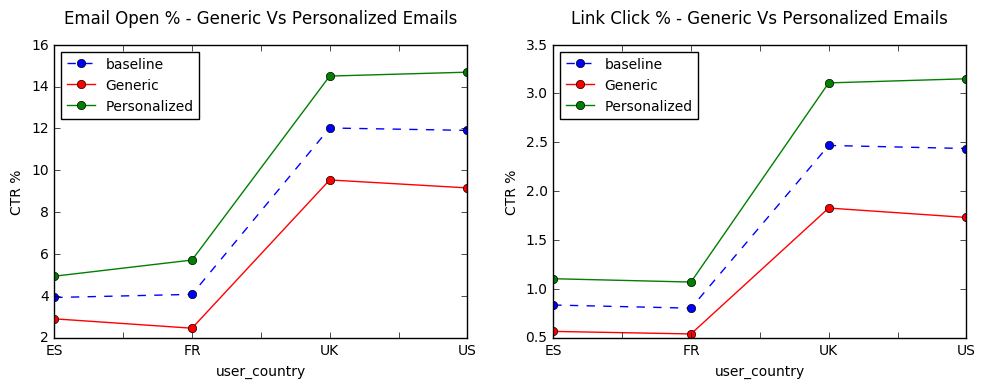

In [284]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
tmp = email.groupby(['user_country']).agg({'email_version':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_version'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_version'])*100
tmp['email_open_per'].plot(marker='o',linestyle='--',label='baseline',ax=ax[0])
tmp['link_click_per'].plot(marker='o',linestyle='--',label='baseline',ax=ax[1])
plt.legend( loc='upper left', numpoints = 1 )

tmp = email[email['email_version']=='generic'].groupby(['user_country']).agg({'email_version':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_version'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_version'])*100
tmp['email_open_per'].plot(marker='o',color='r',label='Generic',ax=ax[0])
tmp['link_click_per'].plot(marker='o',color='r',label='Generic',ax=ax[1])
plt.legend( loc='upper left', numpoints = 1 )

tmp = email[email['email_version']=='personalized'].groupby(['user_country']).agg({'email_version':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_version'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_version'])*100
tmp['email_open_per'].plot(marker='o',color='g',label='Personalized',ax=ax[0])
tmp['link_click_per'].plot(marker='o',color='g',label='Personalized',ax=ax[1])

ax[0].set_ylabel('CTR %')
ax[0].set_title('Email Open % - Generic Vs Personalized Emails',position=[0.5,1.05])
ax[0].legend( loc='upper left', numpoints = 1,fontsize=10 )
ax[1].set_ylabel('CTR %')
ax[1].set_title('Link Click % - Generic Vs Personalized Emails',position=[0.5,1.05])
ax[1].legend( loc='upper left', numpoints = 1,fontsize=10 )
plt.tight_layout()

# Email Text (Short / Long) - Analysis

In [291]:
tmp = email[email['email_version']=='personalized'].groupby(['user_country','email_text']).agg({'email_text':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_text'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_text'])*100
tmp

email_text  email_open  link_click  email_open_per  \
user_country email_text                                                        
ES           long_email         2495       100.0        27.0        4.008016   
             short_email        2495       146.0        28.0        5.851703   
FR           long_email         2508       112.0        20.0        4.465710   
             short_email        2454       171.0        33.0        6.968215   
UK           long_email         4999       651.0       132.0       13.022605   
             short_email        4974       795.0       178.0       15.983112   
US           long_email        15038      1934.0       407.0       12.860753   
             short_email       14828      2452.0       534.0       16.536283   

                          link_click_per  
user_country email_text                   
ES           long_email         1.082164  
             short_email        1.122244  
FR           long_email         0.797448  
             short_email        1.344743  
UK           long_email         2.640528  
             short_email        3.578609  
US           long_email         2.706477  
             short_email        3.601295

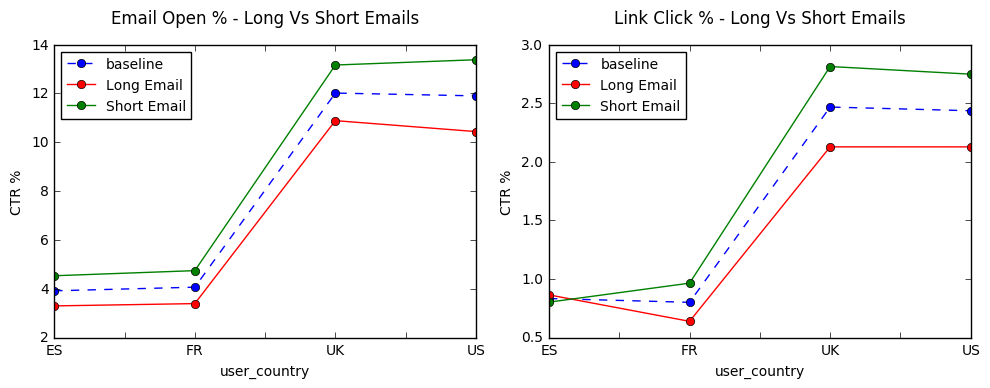

In [286]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
tmp = email.groupby(['user_country']).agg({'email_text':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_text'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_text'])*100
tmp['email_open_per'].plot(marker='o',linestyle='--',label='baseline',ax=ax[0])
tmp['link_click_per'].plot(marker='o',linestyle='--',label='baseline',ax=ax[1])
plt.legend( loc='upper left', numpoints = 1 )

tmp = email[email['email_text']=='long_email'].groupby(['user_country']).agg({'email_text':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_text'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_text'])*100
tmp['email_open_per'].plot(marker='o',color='r',label='Long Email',ax=ax[0])
tmp['link_click_per'].plot(marker='o',color='r',label='Long Email',ax=ax[1])
plt.legend( loc='upper left', numpoints = 1 )

tmp = email[email['email_text']=='short_email'].groupby(['user_country']).agg({'email_text':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_text'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_text'])*100
tmp['email_open_per'].plot(marker='o',color='g',label='Short Email',ax=ax[0])
tmp['link_click_per'].plot(marker='o',color='g',label='Short Email',ax=ax[1])

ax[0].set_ylabel('CTR %')
ax[0].set_title('Email Open % - Long Vs Short Emails',position=[0.5,1.05])
ax[0].legend( loc='upper left', numpoints = 1,fontsize=10 )
ax[1].set_ylabel('CTR %')
ax[1].set_title('Link Click % - Long Vs Short Emails',position=[0.5,1.05])
ax[1].legend( loc='upper left', numpoints = 1,fontsize=10 )
plt.tight_layout()

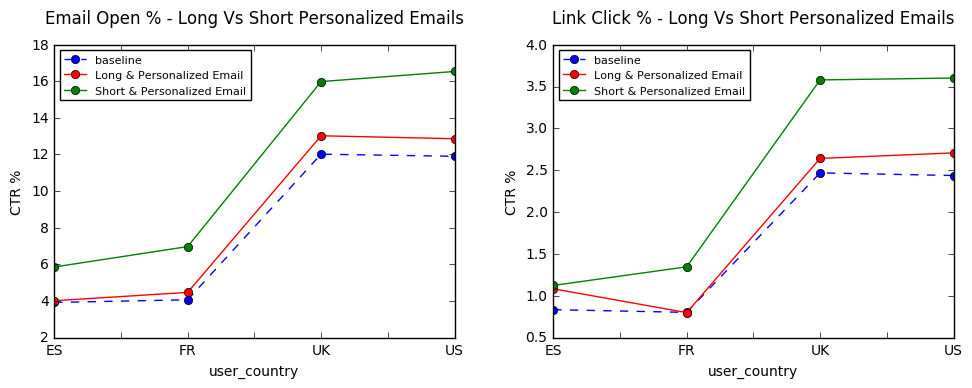

In [289]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
tmp = email.groupby(['user_country']).agg({'email_text':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_text'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_text'])*100
tmp['email_open_per'].plot(marker='o',linestyle='--',label='baseline',ax=ax[0])
tmp['link_click_per'].plot(marker='o',linestyle='--',label='baseline',ax=ax[1])

tmp = email[(email['email_text']=='long_email') & (email['email_version']=='personalized')].groupby(['user_country']).agg({'email_text':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_text'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_text'])*100
tmp['email_open_per'].plot(marker='o',color='r',label='Long & Personalized Email',ax=ax[0])
tmp['link_click_per'].plot(marker='o',color='r',label='Long & Personalized Email',ax=ax[1])

tmp = email[(email['email_text']=='short_email') & (email['email_version']=='personalized')].groupby(['user_country']).agg({'email_text':'size','email_open':'sum','link_click':'sum'})
tmp['email_open_per']= (tmp['email_open']/tmp['email_text'])*100
tmp['link_click_per']= (tmp['link_click']/tmp['email_text'])*100
tmp['email_open_per'].plot(marker='o',color='g',label='Short & Personalized Email',ax=ax[0])
tmp['link_click_per'].plot(marker='o',color='g',label='Short & Personalized Email',ax=ax[1])

ax[0].set_ylabel('CTR %')
ax[0].set_title('Email Open % - Long Vs Short Personalized Emails',position=[0.5,1.05])
ax[0].legend( loc='upper left', numpoints = 1,fontsize=8 )
ax[1].set_ylabel('CTR %')
ax[1].set_title('Link Click % - Long Vs Short Personalized Emails',position=[0.5,1.05])
ax[1].legend( loc='upper left', numpoints = 1,fontsize=8 )
plt.tight_layout()

In [156]:
emaillink=email[email['link_click']==1]
emaillink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 1 to 99999
Data columns (total 10 columns):
email_id               2119 non-null int64
email_text             2119 non-null object
email_version          2119 non-null object
hour                   2119 non-null int64
weekday                2119 non-null object
user_country           2119 non-null object
user_past_purchases    2119 non-null int64
email_open             2119 non-null float64
link_click             2119 non-null float64
weekend                2119 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 182.1+ KB


# Analysis by day & Hour - CTR Analysis

In [293]:
tmp = email.groupby(['user_country','weekday']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp

email_id  link_click  link_per
user_country weekday                                  
ES           Friday         1371         6.0  0.437637
             Monday         1471        19.0  1.291638
             Saturday       1478         4.0  0.270636
             Sunday         1421         6.0  0.422238
             Thursday       1431        11.0  0.768693
             Tuesday        1402        21.0  1.497860
             Wednesday      1393        16.0  1.148600
FR           Friday         1387         6.0  0.432588
             Monday         1400        17.0  1.214286
             Saturday       1473        13.0  0.882553
             Sunday         1425         8.0  0.561404
             Thursday       1399        13.0  0.929235
             Tuesday        1453        10.0  0.688231
             Wednesday      1458        13.0  0.891632
UK           Friday         2874        62.0  2.157272
             Monday         2864        62.0  2.164804
             Saturday       2937        60.0  2.042901
             Sunday         2858        66.0  2.309307
             Thursday       2801        73.0  2.606212
             Tuesday        2860        70.0  2.447552
             Wednesday      2745        99.0  3.606557
US           Friday         8545       125.0  1.462844
             Monday         8628       231.0  2.677330
             Saturday       8681       183.0  2.108052
             Sunday         8683       161.0  1.854198
             Thursday       8646       252.0  2.914643
             Tuesday        8428       251.0  2.978168
             Wednesday      8488       261.0  3.074929

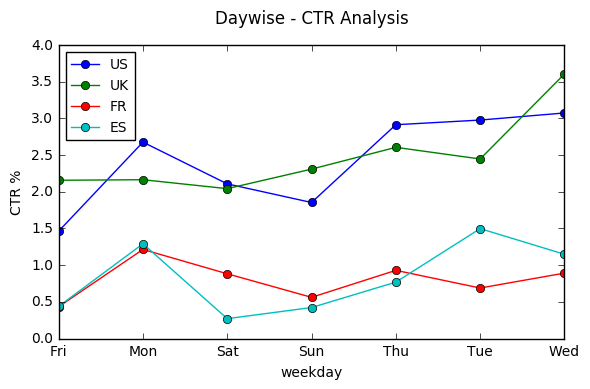

In [320]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
tmp = email[email['user_country']=='US'].groupby(['weekday']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp['link_per'].plot(marker='o',ax=ax,ylim=(0,4),label='US')

tmp = email[email['user_country']=='UK'].groupby(['weekday']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp['link_per'].plot(marker='o',ax=ax,ylim=(0,4),label='UK')

tmp = email[email['user_country']=='FR'].groupby(['weekday']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp['link_per'].plot(marker='o',ax=ax,ylim=(0,4),label='FR')

tmp = email[email['user_country']=='ES'].groupby(['weekday']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp['link_per'].plot(marker='o',ax=ax,ylim=(0,4),label='ES')

ax.legend( loc='upper left', numpoints = 1,fontsize=10 )
ax.set_ylabel('CTR %')
ax.set_title('Daywise - CTR Analysis',position=[0.5,1.05])
plt.xticks(range(7),('Fri','Mon','Sat','Sun','Thu','Tue','Wed'))
plt.tight_layout()

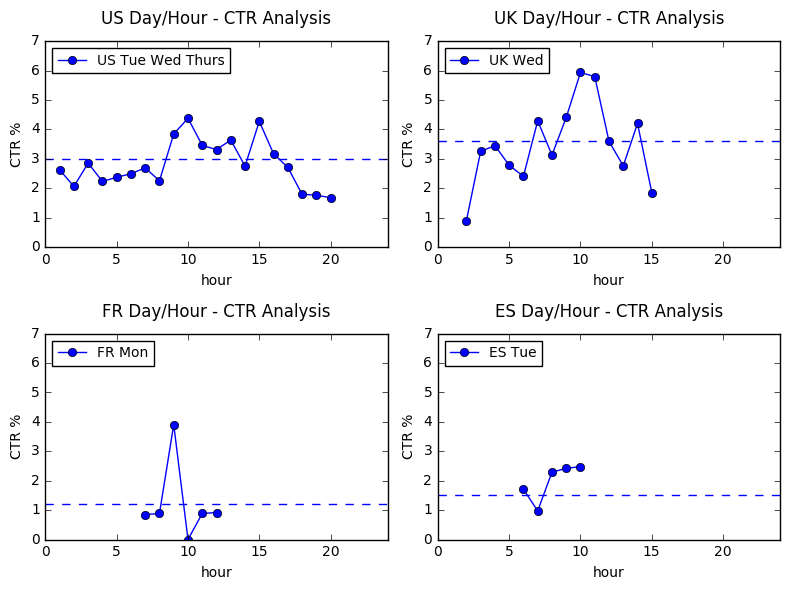

In [357]:
fig,ax = plt.subplots(2,2,figsize=(8,6))
# US
tmp = email[(email['user_country']=='US') & (email['weekday'].isin(['Tuesday','Wednesday','Thursday']))].groupby(['hour']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp[tmp['email_id']>=100]['link_per'].plot(marker='o',ax=ax[0,0],ylim=(0,7),xlim=(0,24),label='US Tue Wed Thurs')

ax[0,0].legend( loc='upper left', numpoints = 1,fontsize=10 )
ax[0,0].set_ylabel('CTR %')
ax[0,0].axhline(y=3,linestyle='--')
ax[0,0].set_title('US Day/Hour - CTR Analysis',position=[0.5,1.05])

# UK
tmp = email[(email['user_country']=='UK') & (email['weekday'].isin(['Wednesday']))].groupby(['hour']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp[tmp['email_id']>=100]['link_per'].plot(marker='o',ax=ax[0,1],ylim=(0,7),xlim=(0,24),label='UK Wed')

ax[0,1].legend( loc='upper left', numpoints = 1,fontsize=10 )
ax[0,1].set_ylabel('CTR %')
ax[0,1].axhline(y=3.6,linestyle='--')
ax[0,1].set_title('UK Day/Hour - CTR Analysis',position=[0.5,1.05])

# FR
tmp = email[(email['user_country']=='FR') & (email['weekday'].isin(['Monday']))].groupby(['hour']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp[tmp['email_id']>=100]['link_per'].plot(marker='o',ax=ax[1,0],ylim=(0,7),xlim=(0,24),label='FR Mon')

ax[1,0].legend( loc='upper left', numpoints = 1,fontsize=10 )
ax[1,0].set_ylabel('CTR %')
ax[1,0].axhline(y=1.2,linestyle='--')
ax[1,0].set_title('FR Day/Hour - CTR Analysis',position=[0.5,1.05])

# ES
tmp = email[(email['user_country']=='ES') & (email['weekday'].isin(['Tuesday']))].groupby(['hour']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp[tmp['email_id']>=100]['link_per'].plot(marker='o',ax=ax[1,1],ylim=(0,7),xlim=(0,24),label='ES Tue')

ax[1,1].legend( loc='upper left', numpoints = 1,fontsize=10 )
ax[1,1].set_ylabel('CTR %')
ax[1,1].axhline(y=1.5,linestyle='--')
ax[1,1].set_title('ES Day/Hour - CTR Analysis',position=[0.5,1.05])

plt.tight_layout()

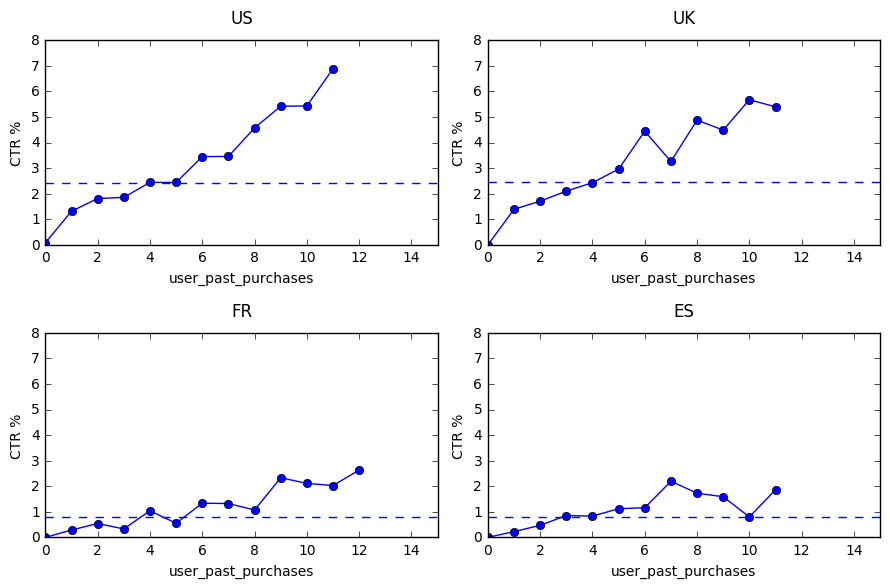

In [416]:
fix,ax = plt.subplots(2,2,figsize=(9,6))
# US
tmp = email[email['user_country']=='US'].groupby(['user_past_purchases']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp1 = tmp[tmp['email_id']/tmp['email_id'].sum() >= 0.01]
tmp1['link_per'].plot(marker='o',xlim=(0,15),ylim=(0,8),ax=ax[0,0])

ax[0,0].set_ylabel('CTR %')
ax[0,0].axhline(y=2.4,linestyle='--')
ax[0,0].set_title('US',position=[0.5,1.05])

# UK
tmp = email[email['user_country']=='UK'].groupby(['user_past_purchases']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp1 = tmp[tmp['email_id']/tmp['email_id'].sum() >= 0.01]
tmp1['link_per'].plot(marker='o',xlim=(0,15),ylim=(0,8),ax=ax[0,1])

ax[0,1].set_ylabel('CTR %')
ax[0,1].axhline(y=2.47,linestyle='--')
ax[0,1].set_title('UK',position=[0.5,1.05])

# FR
tmp = email[email['user_country']=='FR'].groupby(['user_past_purchases']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp1 = tmp[tmp['email_id']/tmp['email_id'].sum() >= 0.01]
tmp1['link_per'].plot(marker='o',xlim=(0,15),ylim=(0,8),ax=ax[1,0])

ax[1,0].set_ylabel('CTR %')
ax[1,0].axhline(y=0.8,linestyle='--')
ax[1,0].set_title('FR',position=[0.5,1.05])

# ES
tmp = email[email['user_country']=='ES'].groupby(['user_past_purchases']).agg({'email_id':'size','link_click':'sum'})
tmp['link_per']= (tmp['link_click']/tmp['email_id'])*100
tmp1 = tmp[tmp['email_id']/tmp['email_id'].sum() >= 0.01]
tmp1['link_per'].plot(marker='o',xlim=(0,15),ylim=(0,8),ax=ax[1,1])

ax[1,1].set_ylabel('CTR %')
ax[1,1].axhline(y=0.8,linestyle='--')
ax[1,1].set_title('ES',position=[0.5,1.05])

plt.tight_layout()

# Model

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [35]:
def refine_data(df):
    df = pd.get_dummies(data=df,drop_first=True,columns=['email_text','email_version','user_country','weekday'])
    df['email_open'] = df['email_open']==1
    df['link_click'] = df['link_click']==1
    df.pop('email_id')
    return df

def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D

    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

In [36]:
df_email = refine_data(email)

In [38]:
y = df_email.pop('link_click')
X = df_email.values
X_train,X_test,y_train,y_test = train_test_split(X,y)


sm = SMOTE(random_state=10)
X_res,y_res = sm.fit_sample(X_train,y_train)

In [39]:
model = LogisticRegression()
mod = model.fit(X_res,y_res)
y_pred = mod.predict(X_test)
[[tp, fp], [fn, tn]] = standard_confusion_matrix(y_test, y_pred)
print 'TP    FP    FN     TN'
print '{}    {}    {}    {}'.format(tp,fp,fn,tn)

TP    FP    FN     TN
532    2052    13    22403
